## UNIVERSIDAD POLITECNICA SALESIANA  --  JUEGO DE LA VIDA

RuntimeError: The animation function must return a sequence of Artist objects.

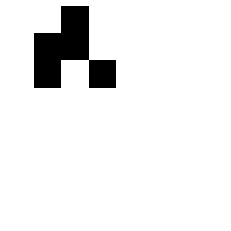

In [6]:

from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation


def vecindario(b):
    """Array de células vivas en el vecindario."""
    vecindario = (
        np.roll(np.roll(b, 1, 1), 1, 0) +  # Abajo-derecha
        np.roll(b, 1, 0) +  # Abajo
        np.roll(np.roll(b, -1, 1), 1, 0) +  # Abajo-izquierda
        np.roll(b, -1, 1) +  # Izquierda
        np.roll(np.roll(b, -1, 1), -1, 0) +  # Arriba-izquierda
        np.roll(b, -1, 0) +  # Arriba
        np.roll(np.roll(b, 1, 1), -1, 0) +  # Arriba-derecha
        np.roll(b, 1, 1)  # Derecha
    )
    return vecindario


def paso(b):
    """Paso en el juego de la vida de Conway."""
    v = vecindario(b)
    buffer_b = b.copy()  # Hacemos una copia de la matriz
    for i in range(buffer_b.shape[0]):
        for j in range(buffer_b.shape[1]):
            if v[i, j] == 3 or (v[i, j] == 2 and buffer_b[i, j]):
                buffer_b[i, j] = 1
            else:
                buffer_b[i, j] = 0
    return buffer_b


# Parámetros del problema
GENERACIONES = 50
N = 8
M = 8

# Construimos el tablero
tablero = np.zeros((N, M), dtype=int)

# Añadimos una nave
tablero[1, 1:4] = 1
tablero[2, 1] = 1
tablero[3, 2] = 1

# Creamos la figura
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.axis('off')
b = tablero
imagen = ax.imshow(b, interpolation="none", cmap=cm.gray_r)


def animate(i):
    global b
    b = paso(b)
    imagen.set_data(b)


anim = animation.FuncAnimation(fig, animate, frames=GENERACIONES, blit=True)
anim.save('juego_vida.mp4', fps=10)